In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Util-функции

In [39]:
def draw_plots(rows, cols, width, height, subplot_data):
    fig, axes = plt.subplots(rows, cols, figsize=(width, height))
    axes = axes.flatten() if rows * cols > 1 else [axes]

    flat_data = [item for row in subplot_data for item in row]

    for idx, data in enumerate(flat_data):
        if idx >= len(axes):
            raise ValueError(f"Too many subplots provided in 'subplot_data': expected at most {rows * cols}, got more.")
        if not data:
            continue

        ax = axes[idx]

        (
            x_arrays, y_arrays,
            labels,
            x_label, y_label,
            colors, linestyles,
            linewidth, markers,
            markersizes
        ) = data + (None,) * (10 - len(data))

        num_plots = len(y_arrays)

        for i in range(num_plots):
            x = x_arrays[i]
            y = y_arrays[i]

            label = labels[i] if labels and i < len(labels) else None
            color = colors[i] if colors and i < len(colors) else None
            linestyle = linestyles[i] if linestyles and i < len(linestyles) else '-'
            lw = linewidth[i] if linewidth and i < len(linewidth) else 2
            marker = markers[i] if markers and i < len(markers) else None
            markersize = markersizes[i] if markersizes and i < len(markersizes) else None

            ax.plot(x, y,
                    label=label,
                    color=color,
                    linestyle=linestyle,
                    linewidth=lw,
                    marker=marker,
                    markersize=markersize)

        if labels:
            ax.legend()
        ax.grid(True)
        if x_label:
            ax.set_xlabel(x_label)
        if y_label:
            ax.set_ylabel(y_label)
    
    for idx in range(len(flat_data), len(axes)):
        fig.delaxes(axes[idx])
        
    plt.gca().set_axisbelow(True) 
    plt.tight_layout()
    plt.show()

Наборы значений

In [40]:
ab = ((1, 3), (2, 2), (3, 1))

# Задание 1

#### Функции

In [41]:
rect_func = lambda t, a, b: a if abs(t) <= b else 0
triangle_func = lambda t, a, b: a - abs(a * t / b) if abs(t) <= b else 0
card_sin = lambda t, a, b: a * np.sinc(b * t)
hauss = lambda t, a, b: a * np.exp(- b * t * t)
two_way_attenuation = lambda t, a, b: a * np.exp(- b * abs(t))

#### Фурье-образы функций

In [42]:
fourier_transform_rect_func = lambda w, a, b: a * np.sqrt(2) * np.sin(w * b) / (w * np.sqrt(np.pi))
fourier_transform_triangle_func = lambda w, a, b: 2 * np.sqrt(2) * a * np.sin(w * b / 2) ** 2 / (w * w * b * np.sqrt(np.pi))
fourier_transform_card_sin = lambda w, a, b: np.sqrt(np.pi / 2) * a / b if abs(w) < b else 0
fourier_transform_hauss = lambda w, a, b: a * np.sqrt(1 / (2 * b)) * np.exp(- w * w / (4 * b))
fourier_transform_two_way_attenuation = lambda w, a, b: a * b * np.sqrt(2 / np.pi) / (b * b + w * w)

### Построим графики

In [43]:
t_spaces = [
    np.linspace(-8, 8, 1000), 
    np.linspace(-8, 8, 1000), 
    np.linspace(-8, 8, 1000), 
    np.linspace(-8, 8, 1000), 
    np.linspace(-8, 8, 1000)
]
w_spaces = [
    np.linspace(-20, 20, 1000), 
    np.linspace(-20, 20, 1000), 
    np.linspace(-20, 20, 1000), 
    np.linspace(-20, 20, 1000), 
    np.linspace(-20, 20, 1000)
]
ft = [
    [[rect_func(t, a, b) for t in t_spaces[0]] for (a, b) in ab],
    [[triangle_func(t, a, b) for t in t_spaces[1]] for (a, b) in ab],
    [[card_sin(t, a, b) for t in t_spaces[2]] for (a, b) in ab],
    [[hauss(t, a, b) for t in t_spaces[3]] for (a, b) in ab],
    [[two_way_attenuation(t, a, b) for t in t_spaces[4]] for (a, b) in ab]
]
fw = [
    [[fourier_transform_rect_func(w, a, b) for w in w_spaces[0]] for (a, b) in ab],
    [[fourier_transform_triangle_func(w, a, b) for w in w_spaces[1]] for (a, b) in ab],
    [[fourier_transform_card_sin(w, a, b) for w in w_spaces[2]] for (a, b) in ab],
    [[fourier_transform_hauss(w, a, b) for w in w_spaces[3]] for (a, b) in ab],
    [[fourier_transform_two_way_attenuation(w, a, b) for w in w_spaces[4]] for (a, b) in ab]
]

In [44]:
function_names = [
    "Rectangular function",
    "Triangle function",
    "Cardinal sine",
    "Gaussian",
    "Two-way exponential"
]

colors = ['blue', 'green', 'red']
linestyles = ['-', '-', '-']
labels = [f"(a={a}, b={b})" for (a, b) in ab]

subplot_data = []

for i in range(5):
    time_plot = (
        [t_spaces[i]] * len(ab),
        ft[i],
        labels,
        "t, sec", "f(t)",
        colors, linestyles,
        [1]*len(ab),
        [None]*len(ab),
        [None]*len(ab)
    )

    freq_plot = (
        [w_spaces[i]] * len(ab),
        fw[i],
        labels,
        "w, rad", "f(w)",
        colors, linestyles,
        [1]*len(ab),
        [None]*len(ab),
        [None]*len(ab)
    )

    subplot_data.append([time_plot, freq_plot])

#### Прямоугольная функция

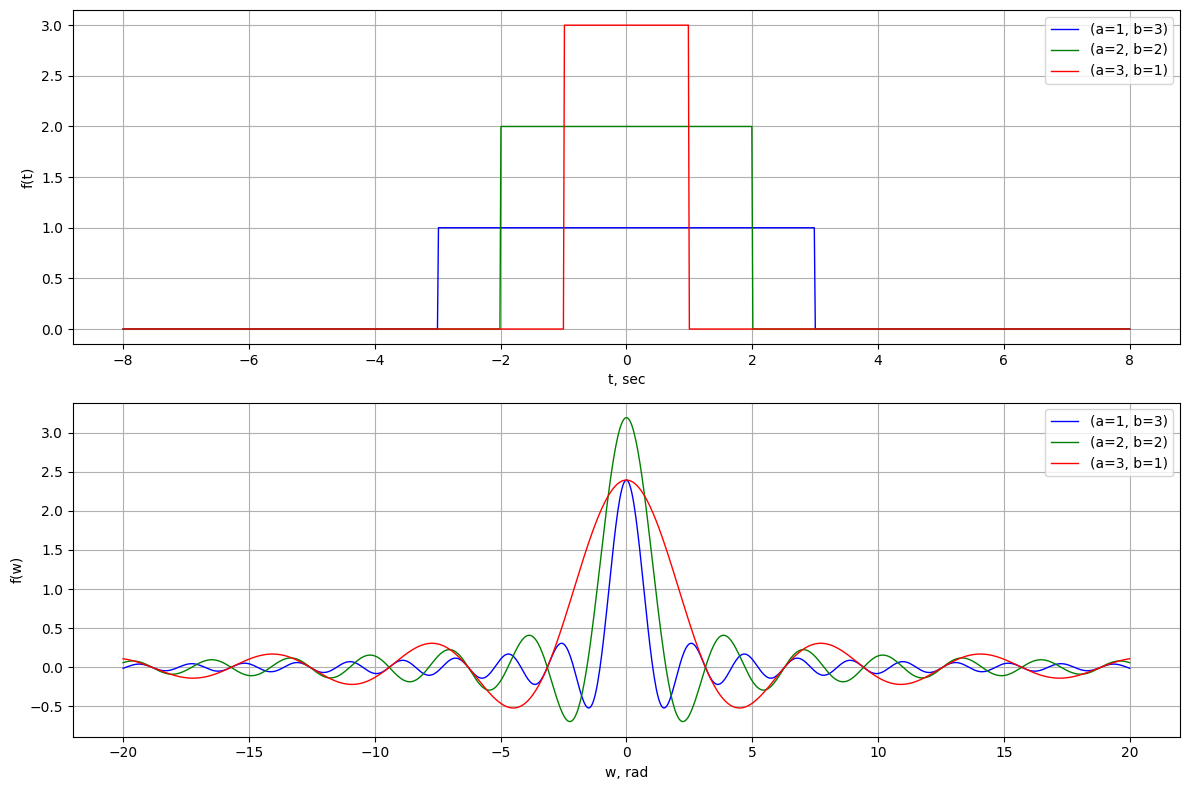

In [45]:
draw_plots(rows=2, cols=1, width=12, height=8, subplot_data=[[plot] for plot in subplot_data[0]])

#### Треугольная функция

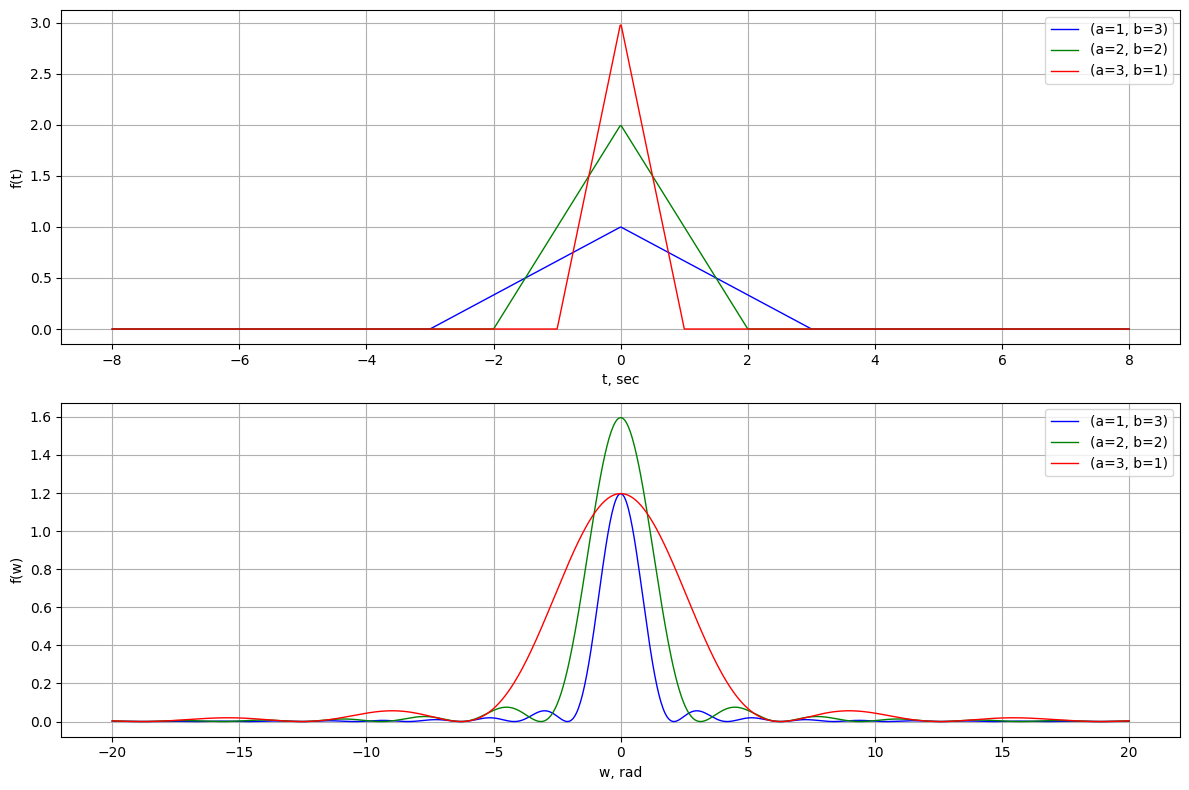

In [46]:
draw_plots(rows=2, cols=1, width=12, height=8, subplot_data=[[plot] for plot in subplot_data[1]])

#### Кардинальный синус

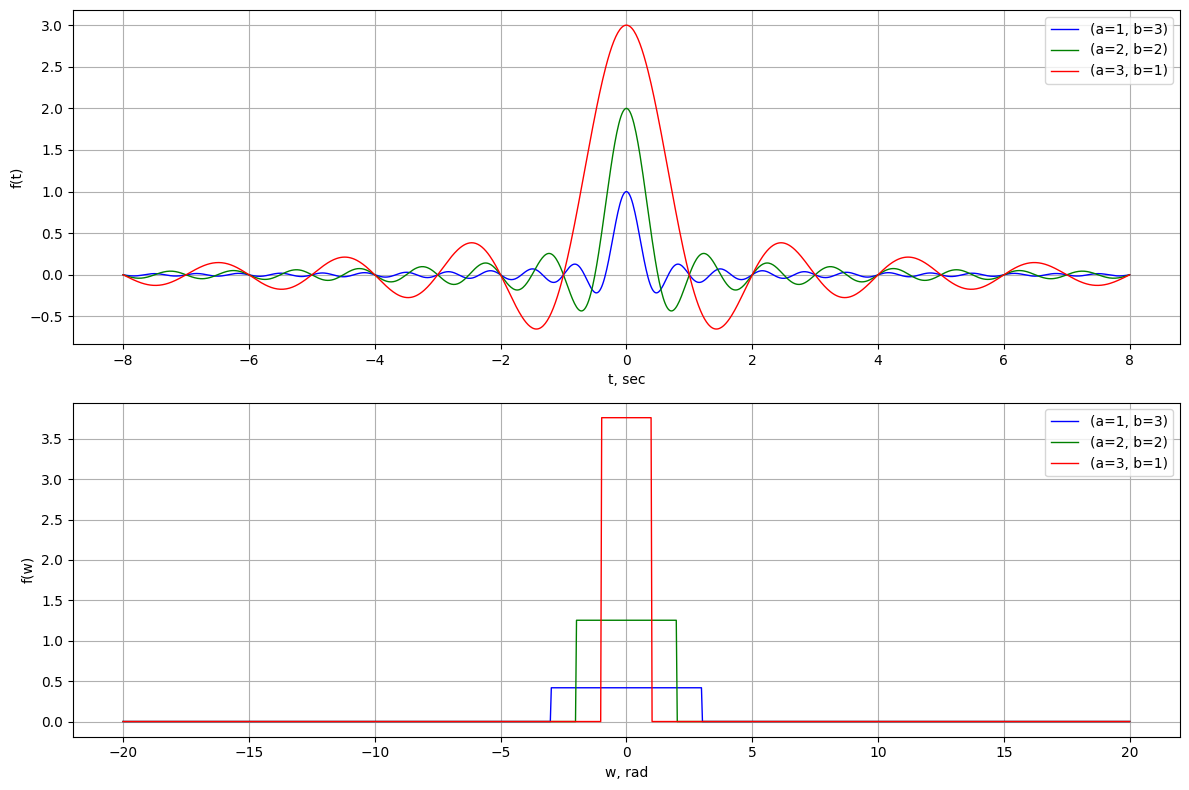

In [47]:
draw_plots(rows=2, cols=1, width=12, height=8, subplot_data=[[plot] for plot in subplot_data[2]])

#### Функция Гаусса

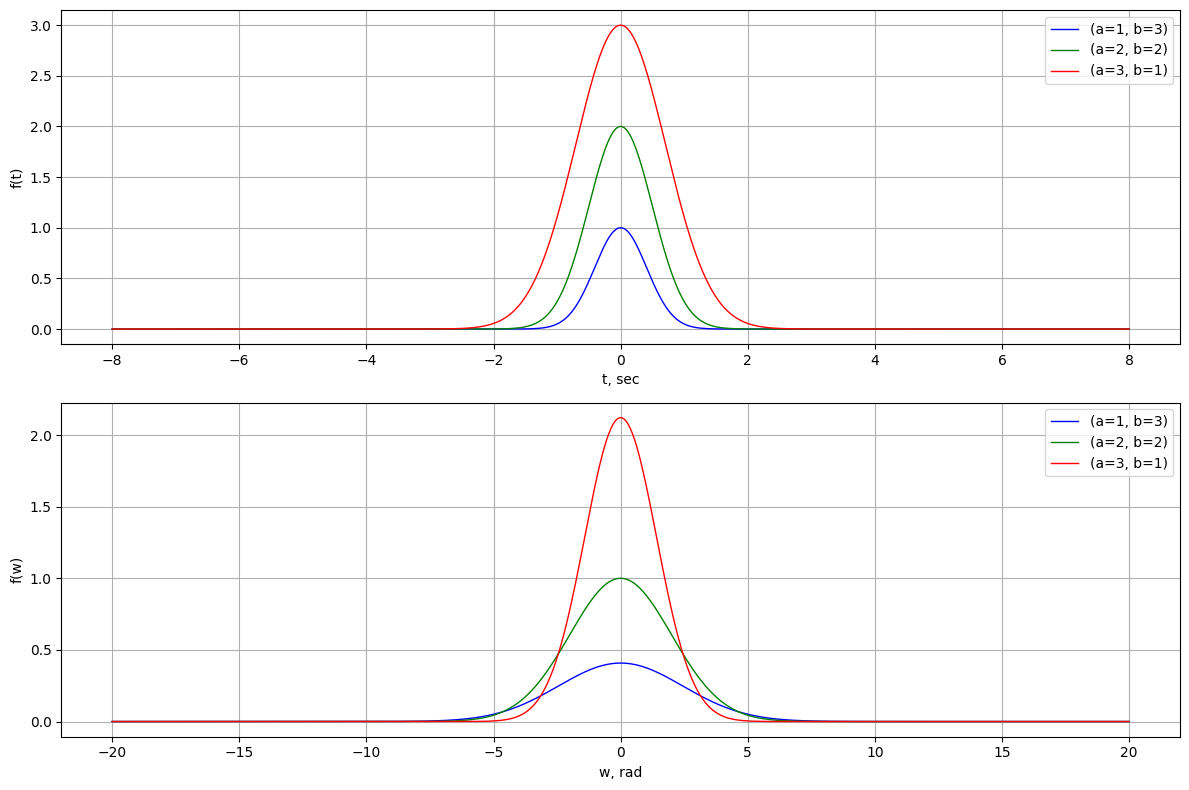

In [48]:
draw_plots(rows=2, cols=1, width=12, height=8, subplot_data=[[plot] for plot in subplot_data[3]])

#### Двустороннее затухание

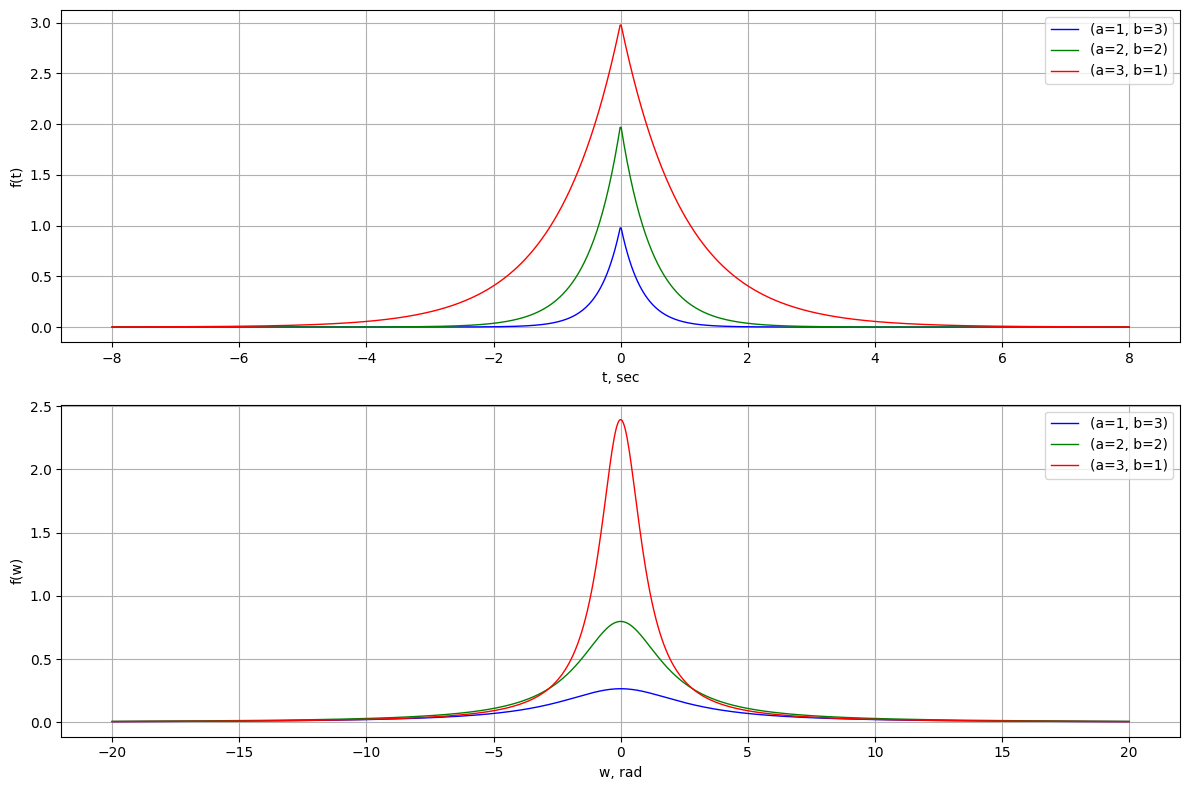

In [49]:
draw_plots(rows=2, cols=1, width=12, height=8, subplot_data=[[plot] for plot in subplot_data[4]])